**Assignment: Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere. Get going by asking the following questions and looking for the answers with some code and plots:**  
>   **1. Can you count something interesting?**  
**2. Can you find some trends (high, low, increase, decrease, anomalies)?**  
**3. Can you make a bar plot or a histogram?**  
**4. Can you compare two related quantities?**  
**5. Can you make a scatterplot?**  
**6. Can you make a time-series plot?**  

**Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?**

**By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?**

----
----

###  **Here are specific questions I seek to answer in this assignment:**

###  **What is data capture at SNOTEL site? Can the data be interpolated to decrease missing values?**
### 1.  **What are annual temperature and snow depth trends for the SNOTEL site?**
### 2.  **How do ASOS temperatures compare to the SNOTEL temperatures?**
### 3.  **Is the SNOTEL site typically warmer then then the ASOS site?**
### 4.  **What is statistical distribution of snow depth by month for each ski season?**
### 5.  **When do 12-hr snowfall events >3 occur"?**
### 6.  **What is mean, max and statistical distribution of snowfall events by ski season?**

**The following discusses and shows code inputs/outputs associated with these questions**

----

### General Setup:

**Import necessary modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt



**Import the ASOS and SNOTEL data as dataframes**

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
print(snotel_df.head())

                     Temperature_degC  Dewpoint_degC  Pressure_hp  \
Date_Time                                                           
2006-01-01 01:00:00              -1.0           -7.0          NaN   
2006-01-01 02:00:00              -3.0           -8.0          NaN   
2006-01-01 03:00:00              -4.0           -8.0          NaN   
2006-01-01 04:00:00              -4.0           -9.0          NaN   
2006-01-01 05:00:00              -5.0           -8.0          NaN   

                     WindDirection_deg  WindSpeed_m/s  CloudCover  \
Date_Time                                                           
2006-01-01 01:00:00              220.0            7.7         NaN   
2006-01-01 02:00:00              230.0            5.1         NaN   
2006-01-01 03:00:00              230.0            3.6         NaN   
2006-01-01 04:00:00              240.0            6.2         NaN   
2006-01-01 05:00:00              210.0            6.2         NaN   

                     1hr_Precipi

----



### Q0: Are there any additional outliers in the SNOTEL data?  
**This question was answered by plotting time series plots of the temperature and snow depth SNOTEL data (snotel_df dataframe).  WHen plotted, the snow depth timeseries plot does show some anomalies (many sporadic and unrealistic spikes above 100 inches, and some < -100 inches). These datapoint could most certainly be considered outliers, as the spikes are at least 50 inches from the datapoints surrounding the spikes.  It is very unrealistic to obtain that much snow, and then have that amount of snow melt so quickly. These datapoints should not be included in further analyses.   Thus, all values >100 inches and <-100 inches are set to NaN values in the snotel_df for all future analyses.  In addition, there a couple of points in year 2015 where the snow depth jumped to 70-80 inches.  These will be eliminated as well.**

       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count     104027.000000    91266.000000
mean           1.364769       21.237504
std            9.123291       21.391880
min          -33.100000     -196.000000
25%           -5.000000        0.000000
50%            1.300000       18.000000
75%            7.700000       39.000000
max           25.800000      189.000000


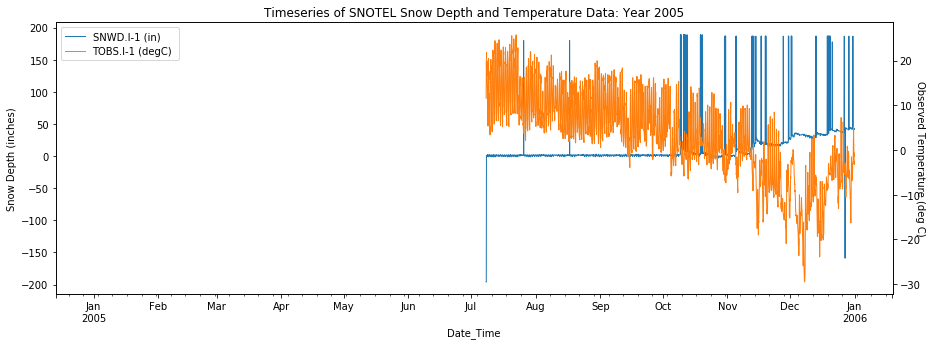

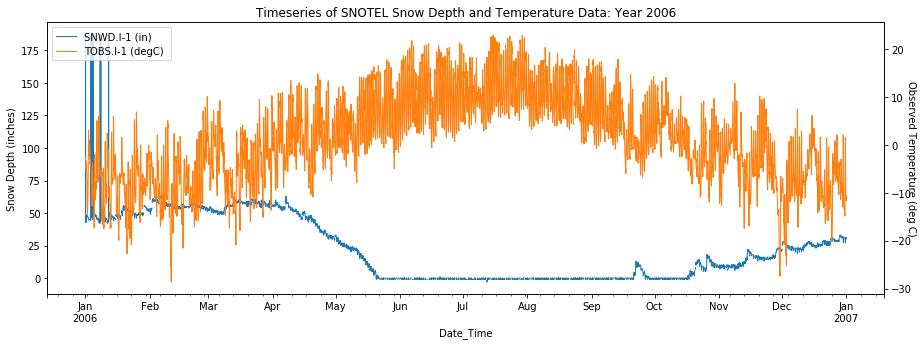

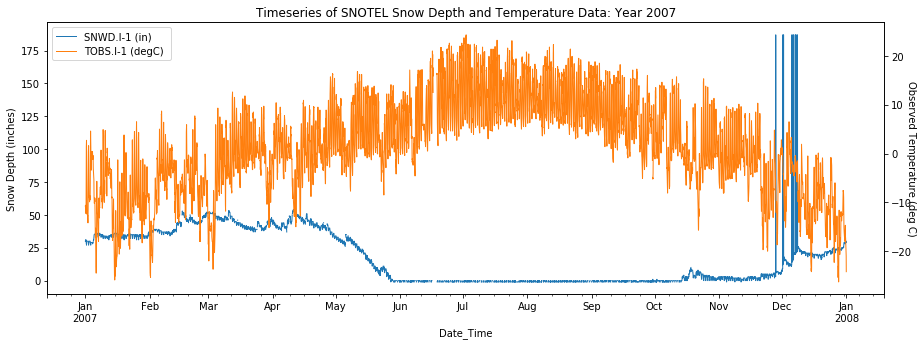

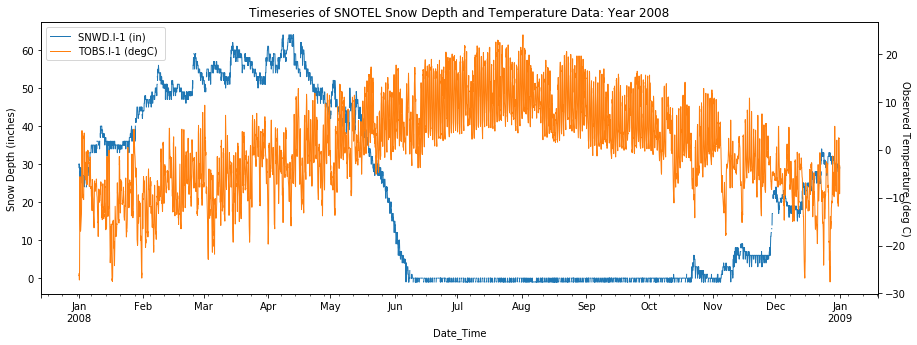

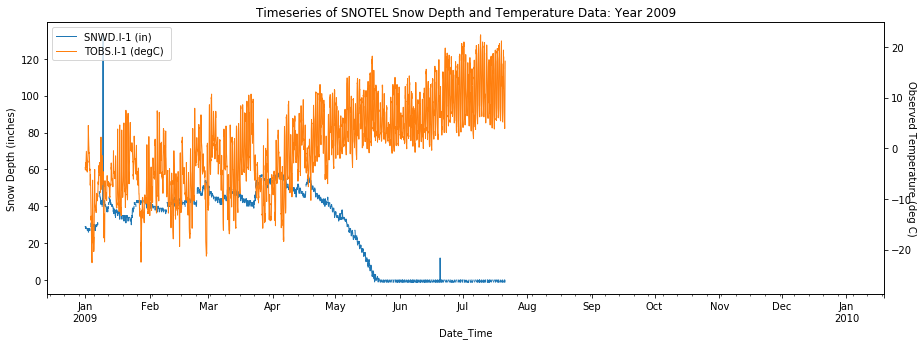

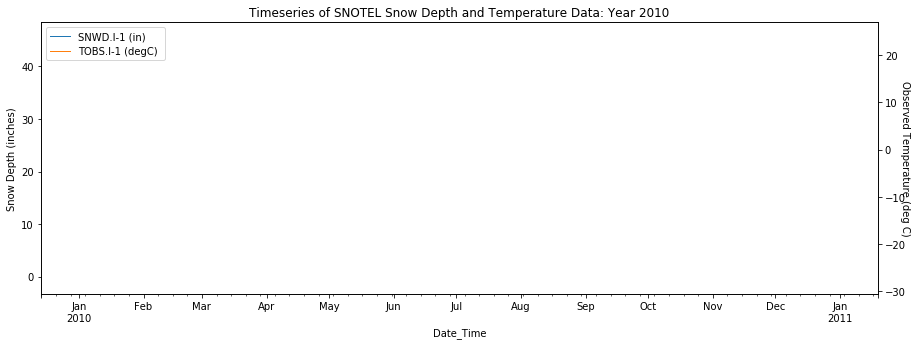

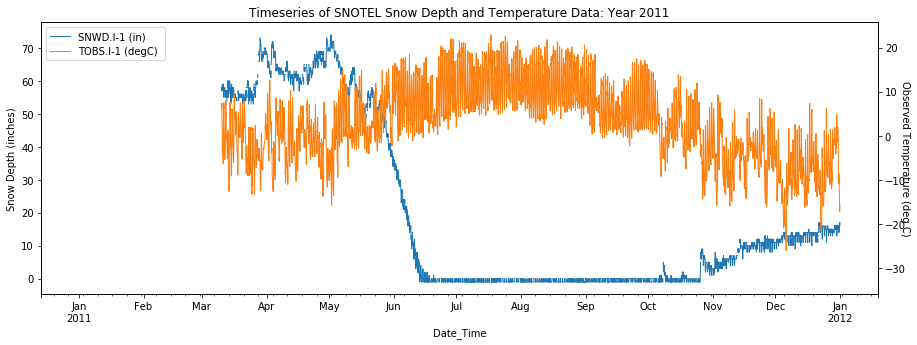

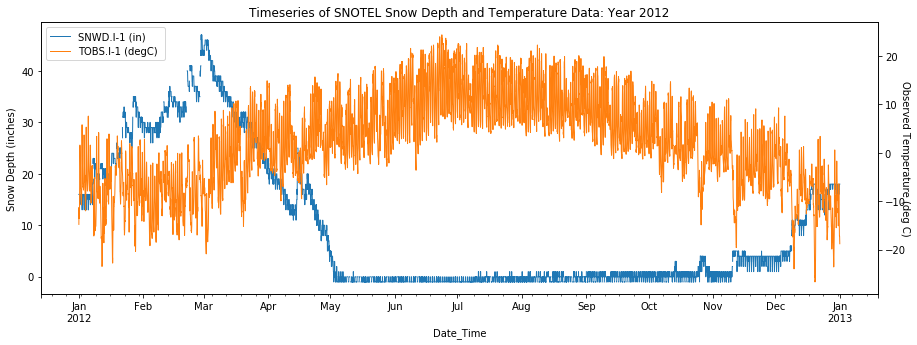

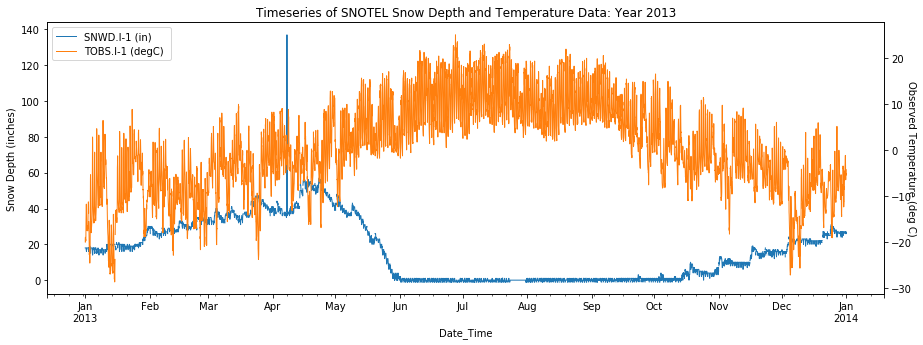

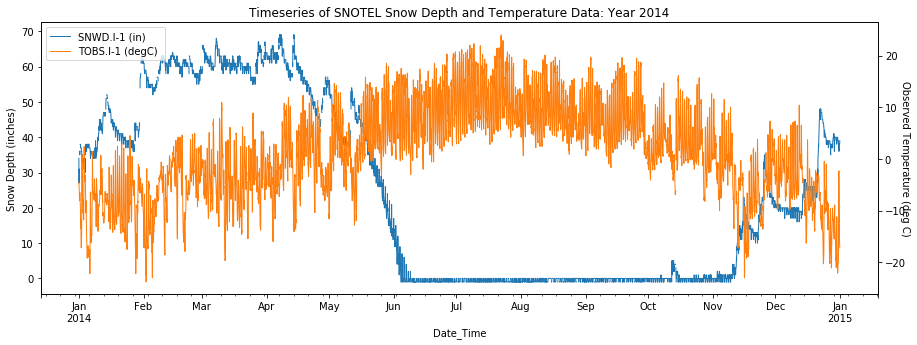

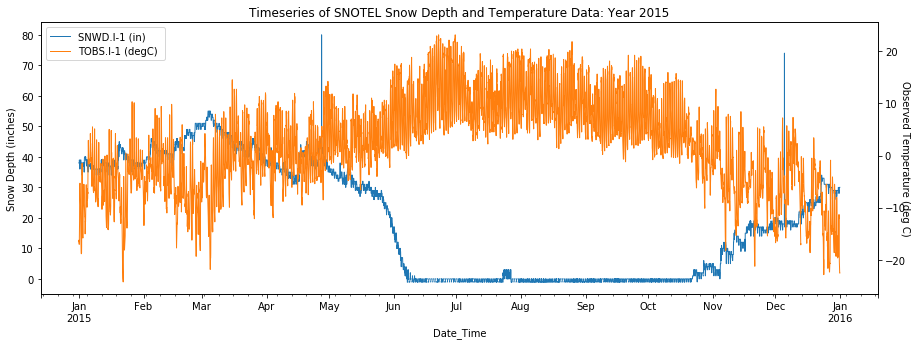

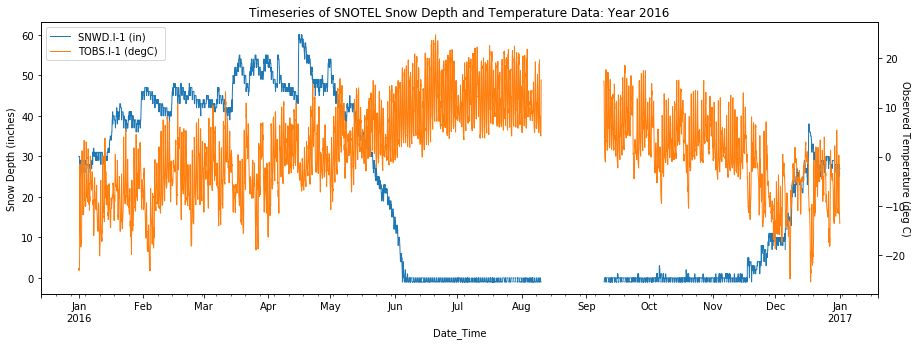

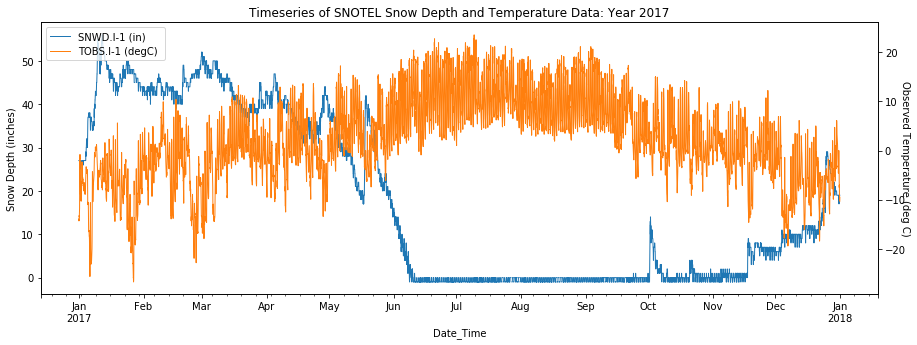

In [3]:
print(snotel_df.describe())

years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for j in years:
    plt.figure(figsize=(15,5))
    
    ax1 = snotel_df['SNWD.I-1 (in) ']['%04s' % j].plot(use_index=True, linewidth=1)
    ax1.set_ylabel("Date")
    ax1.set_ylabel("Snow Depth (inches)")
    ax1.set_title("Timeseries of SNOTEL Snow Depth and Temperature Data: Year " + j)
   
    ax2 = snotel_df['TOBS.I-1 (degC) ']['%04s' % j].plot(use_index=True, secondary_y = True, linewidth=1)
    ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    
    #Create legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

    plt.show()

**Based on findings in Q0, the snow depth column of the snotel_df dataframe will be redefined with datapoints >100 inches or <-100 inches being eliminated.**  **Data points >70 inches were also elminated from year 2015.**

In [4]:
xx=(snotel_df['SNWD.I-1 (in) ']<-100) | (snotel_df['SNWD.I-1 (in) ']>100) | (snotel_df['SNWD.I-1 (in) ']['2015']>70)
snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
print(snotel_df['SNWD.I-1 (in) '].describe())


count    91158.000000
mean        21.061256
std         20.634326
min         -3.000000
25%          0.000000
50%         18.000000
75%         39.000000
max         74.000000
Name: SNWD.I-1 (in) , dtype: float64


----
----


## Q1: What is data capture at SNOTEL site?  Can the data be interpolated to decrease missing values?

**To answer this question, annual bar plots showing monthly % data capture for both the temperature and snow depth columns of the snotel_df dataframe.  In addition, bar plots of the same variable using a dataframe copy of snotel_df, except hours where 3 or less consectutive missing hours are filled using interpolation.  Code for this is found below.  The resulting plots show that there is great data capture for temperature for most months, even before filling.  For snow depth, data capture is less, but a substantial decrease in missing values results due to interpolation, demonstrating that many of the missing values are not for long periods of time. Based on this finding a new dataframe (snotel_filled_df) will be created containing these interpolated values and used for all future analyses.**

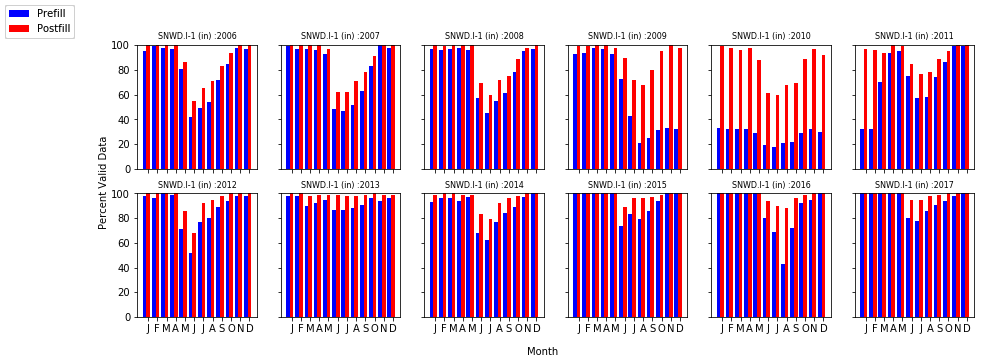

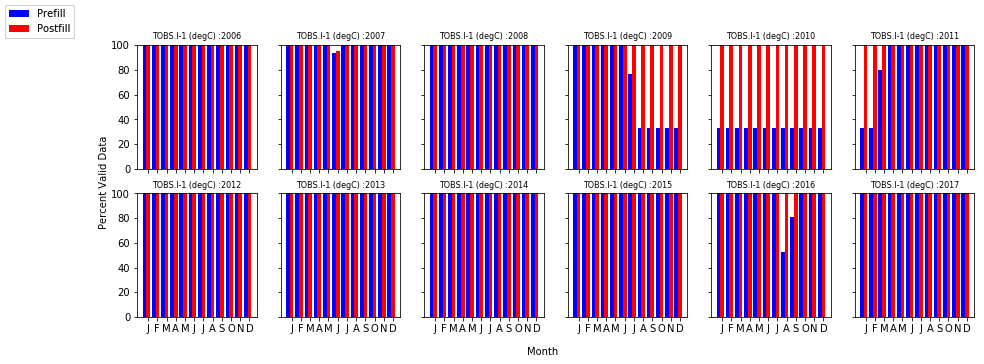

In [5]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
#%matplotlib notebook

#create separate figure for the snow depth and temperature columns.  Each figure will contain subplots, one subplot for each year.  Each subplot will contain bars showing data capture (pre and post filling) for each month of that year
for key in ('SNWD.I-1 (in) ','TOBS.I-1 (degC) '):  #snotel_df.keys():#snotel_df[snotel_df.keys() != 'Date_time']:
    
    #set up primary figure to house subplots
    fig,ax1 = plt.subplots(2, 6, sharex = True, sharey = True, figsize=(15,5))
    fig.text(0.5, 0.02, 'Month', ha='center')
    fig.text(0.09, 0.5, 'Percent Valid Data', va='center', rotation='vertical')

            
    for i, a in enumerate(ax1.flatten()):    
        
        if i>len(years)-1: break
        PercentValid = []
        PercentValid_fill = []
        
        #Calculate % missing for each month
        for k in range(12):
            Missing = snotel_df[key]['%02d-%04s' % (k+1,years[i])].isnull().sum()                               #Calcuate number of missing values after interpolation
            Missing_filled = snotel_df[key]['%02d-%04s' % (k+1,years[i])].interpolate(limit=3).isnull().sum()   #Calcuate number of missing values after interpolation
            Possible = len(snotel_df[key]['%02d-%04s' % (k+1,years[i])])
            PercentValid.append(round((1-Missing/Possible)*100))
            PercentValid_fill.append(round((1-Missing_filled/Possible)*100))
        
        # creat subplot
        ind = np.arange(12)
        bar1 = a.bar(ind,PercentValid, width = 0.4, color = 'b', align = 'center')
        bar2 = a.bar(ind+0.4,PercentValid_fill, width = 0.4, color = 'r', align = 'center')
        a.set_title(key + ":" + years[i], fontsize = 8)
        
        a.set_ylim(0,100)
        a.set_xticks(ind+0.4)
        a.set_xticklabels(('J','F','M','A','M','J','J','A','S','O','N','D'))

        fig.legend((bar1, bar2), ('Prefill', 'Postfill'), loc='upper left', fontsize = 10) 
        
    plt.show()

    

----

**Based on findings of Q1, a copy of the snotel_df is made.  In that copy, missing hours where 3 or less consectutive missing hours are filled using interpolation.  
This new dataframe (snotel_filled_df) will be the dataframe used for future analyses.**

In [6]:
snotel_filled_df= snotel_df.copy()
snotel_filled_df = snotel_df.interpolate(limit=3)
print(snotel_filled_df.describe())


       TOBS.I-1 (degC)   SNWD.I-1 (in) 
count     114978.000000   106368.000000
mean           1.229866       19.890344
std            9.159036       20.601696
min          -33.100000       -3.000000
25%           -5.200000        0.000000
50%            1.200000       15.000000
75%            7.600000       38.000000
max           25.800000       74.000000


----



## Q2: What are typical annual temperature and snow depth trends at the SNOTEL site?  
**This question was answered by generating timeseries plots similar to those created for Q0, except that the filled snotel_filled_df (dataframe with some filled data, along with some obvious outliers removed) will be used.  
Timeseries from the snow depth and temperature columns were again be plotted by year.  Plots show expected behaviour for the Colorado mountain. Snow begins to consistenly accumulate in late October-Mid November, and snowpack disappears in the early May-mid June time frame.  Temperatures follow a seasonal pattern, peaking mid-June to mid-August where temperature consistenly reach above 20 degree C.  The months of December, January, February, and March are marked by cold snaps where temperatures drop below -20 degrees C. **

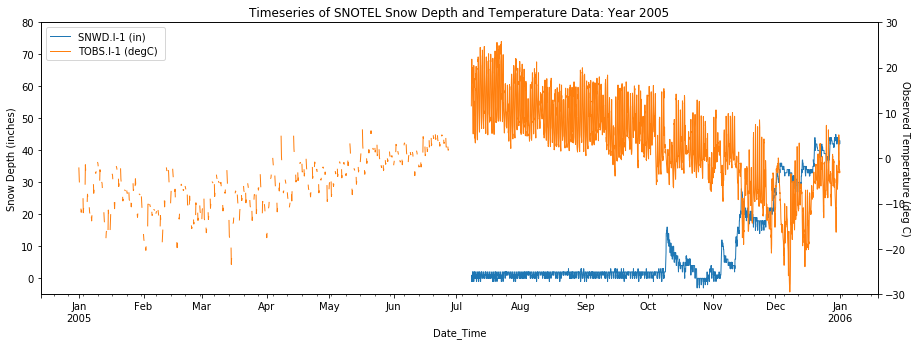

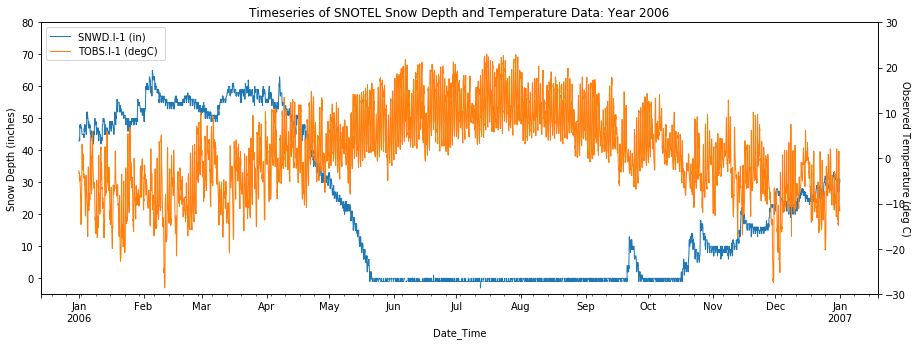

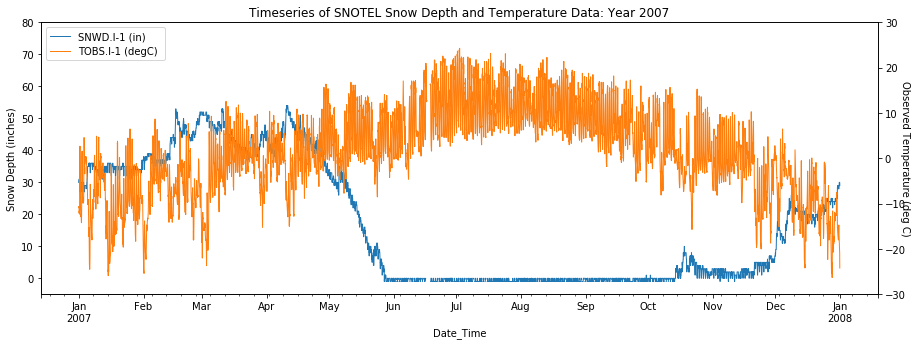

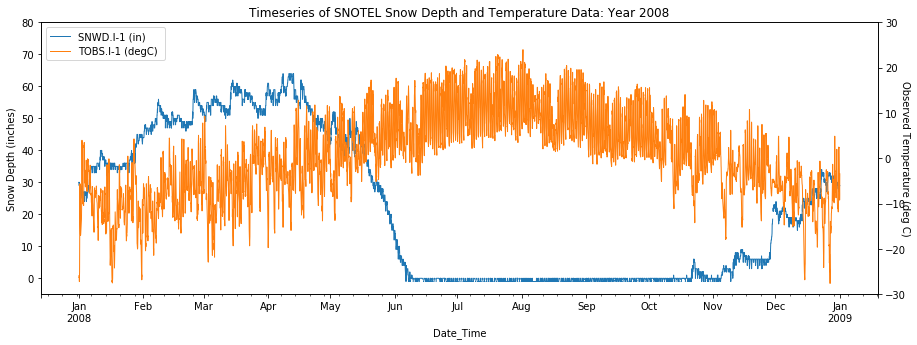

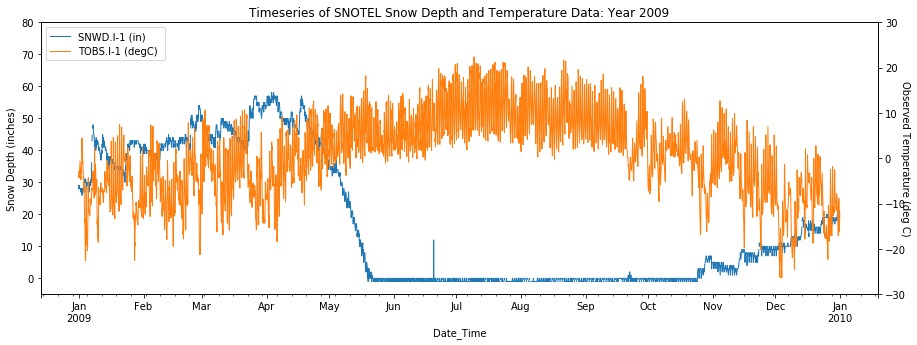

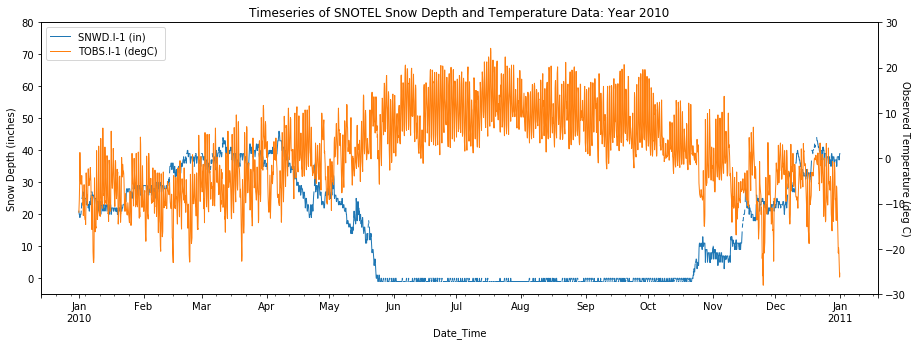

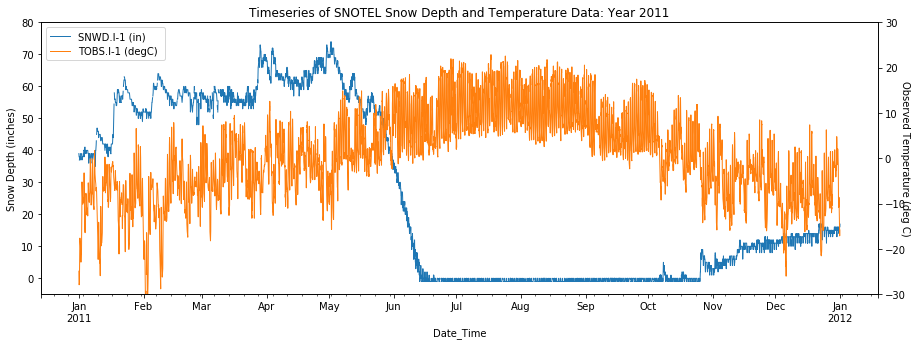

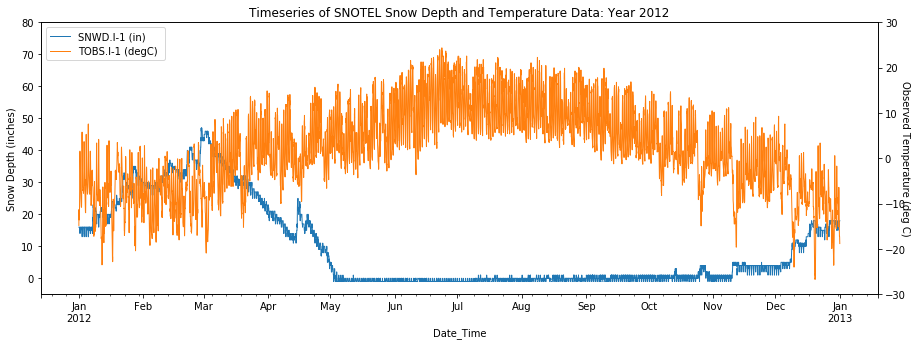

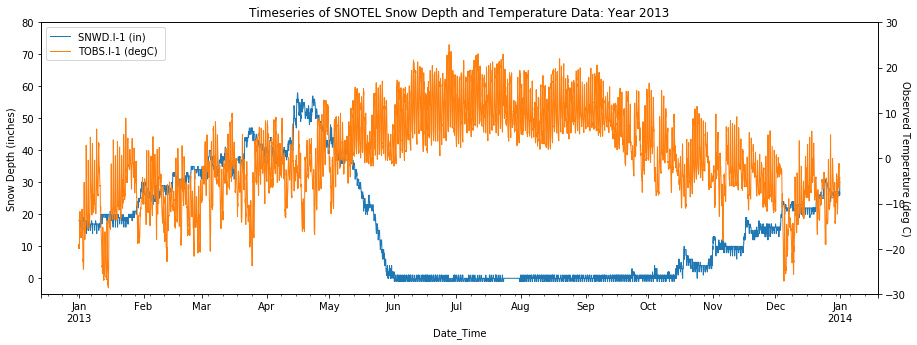

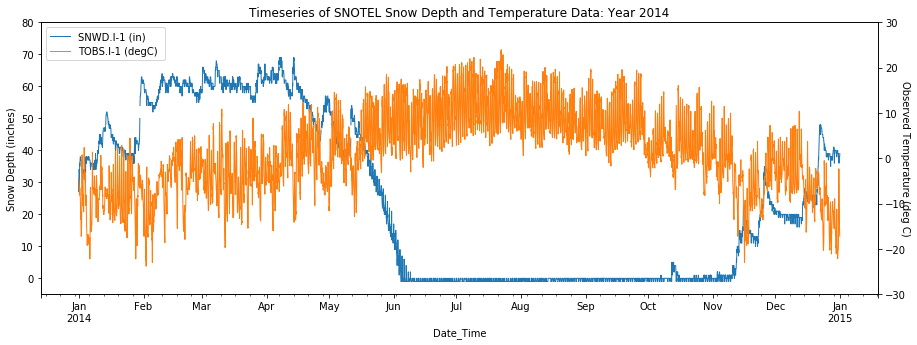

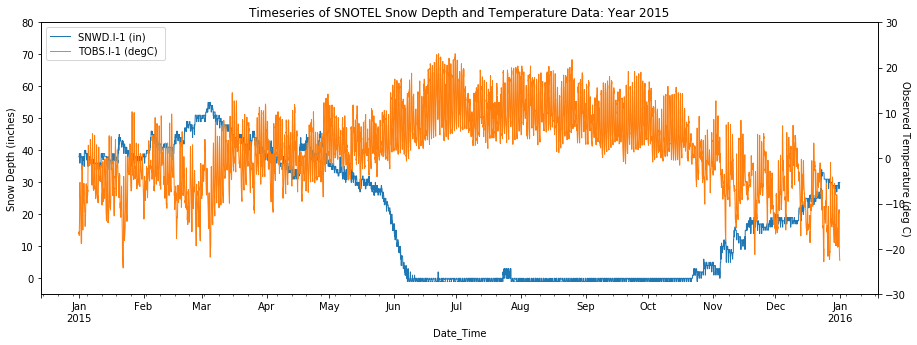

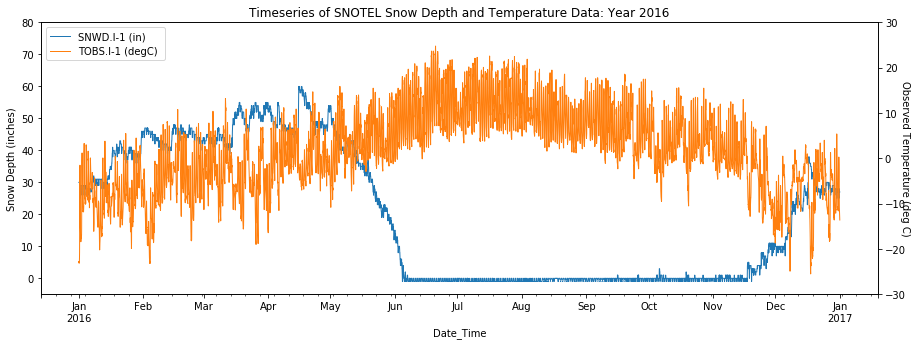

In [38]:
# %matplotlib notebook

years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for j in years:
    plt.figure(figsize=(15,5))
    
    ax1 = snotel_filled_df['SNWD.I-1 (in) ']['%04s' % j].plot(use_index=True, linewidth=1)
    ax1.set_ylabel("Date")
    ax1.set_ylim(ymin=-5, ymax = 80)
    ax1.set_ylabel("Snow Depth (inches)")
    ax1.set_title("Timeseries of SNOTEL Snow Depth and Temperature Data: Year " + j)
   
    ax2 = snotel_filled_df['TOBS.I-1 (degC) ']['%04s' % j].plot(use_index=True, secondary_y = True, linewidth=1)
    ax2.set_ylabel("Observed Temperature (deg C)", rotation = -90)
    ax2.set_ylim(ymin=-30, ymax = 30)
    
    #Create legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc=2)
      
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')

    plt.show()


-----



## Q3: How do ASOS temperatures compare to the SNOTEL temperatures? 
**Both the ASOS station and the nearby SNOTEL station recorded temperture during the same time period, and it would be interesting to compare these against each other. It would also be a good test to see if the data are paired in time, as the temperature trends between the two sites should be very similar.  This comparision was performed by plotting timeseries plots (again, one for each year) which contained the SNOTEL and ASOS temperature series. Plots should good pairing, as they both tracked well against each other.  However, it appears that the ASOS station might be reporting slightly colder temperatures (especially low temperatures) then the SNOTEL site, though it is hard to determine from the time series plots.  Such behavour would be expected as the ASOS station is located at an elevation of 3680m (12074 ft) whereas the SNOTEL station is located at 3216 m (10550 ft).**

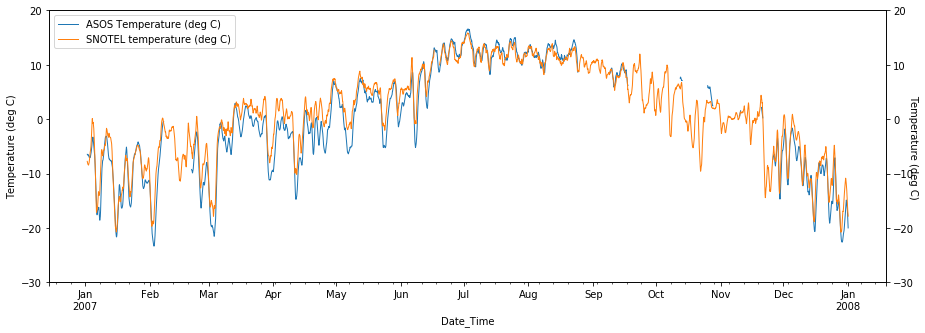

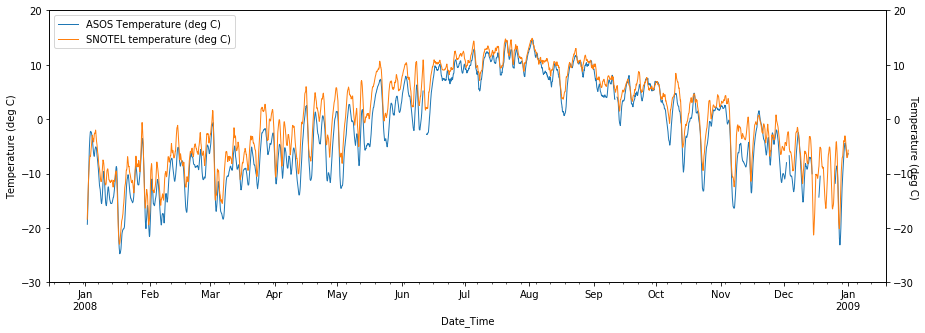

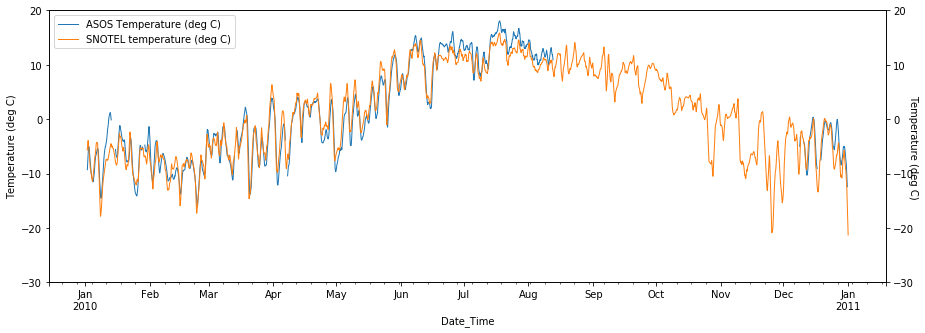

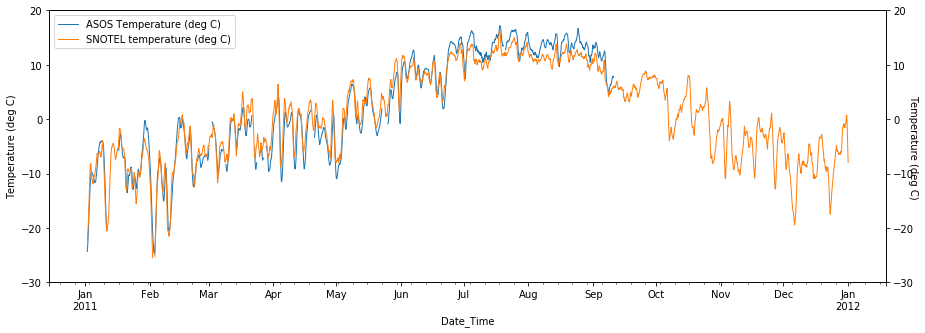

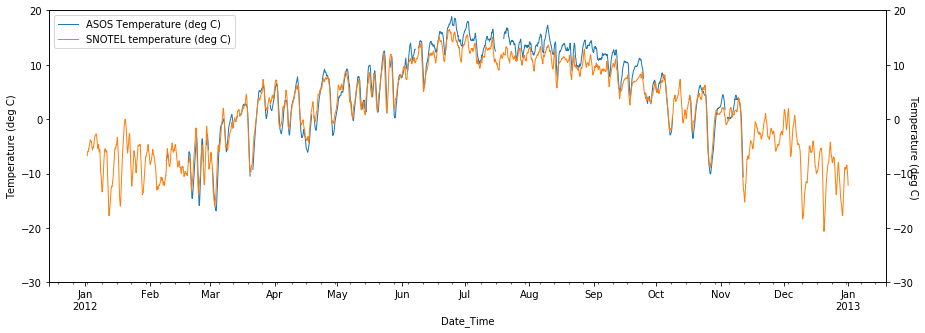

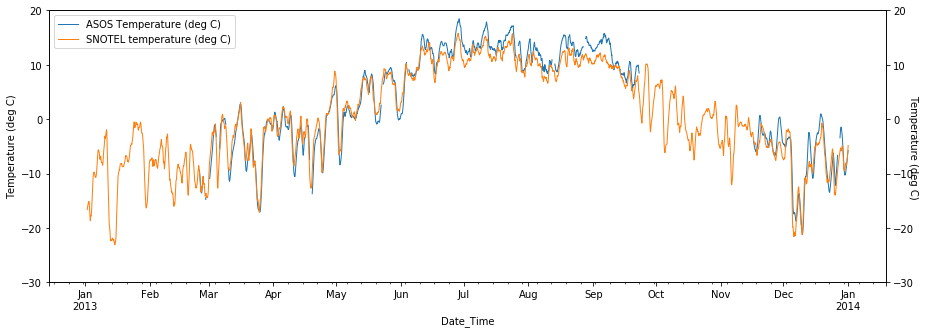

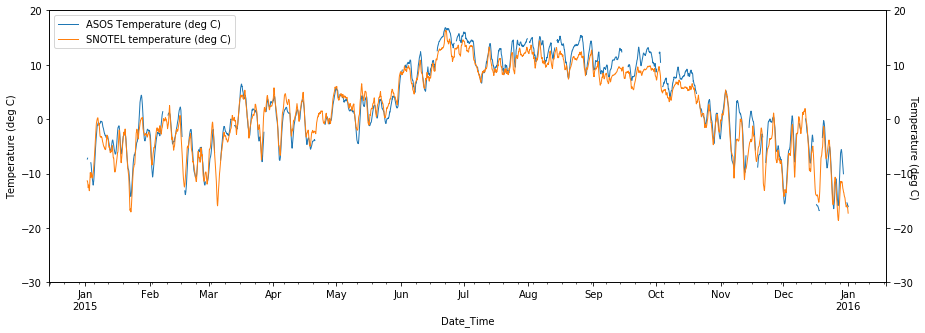

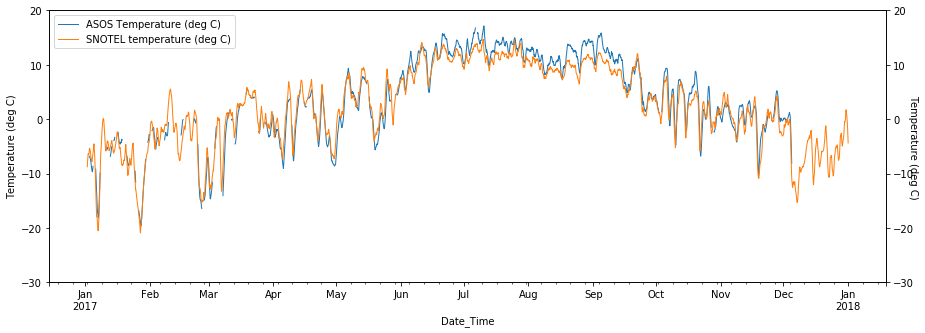

In [8]:
#%matplotlib notebook

years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for j in years:
    plt.figure(figsize=(15,5))
    ax1 = asos_df['Temperature_degC']['%04s' % j].interpolate(limit=3).rolling(24).mean().plot(use_index=True, linewidth=1)
    ax2 = snotel_filled_df['TOBS.I-1 (degC) ']['%04s' % j].rolling(24).mean().plot(use_index=True, secondary_y = True, linewidth=1)
    ax1.set_ylabel("Temperature (deg C)")
    ax2.set_ylabel("Temperature (deg C)", rotation = -90)
    ax1.set_ylim(-30,20)
    ax2.set_ylim(-30,20)
    
    #Create legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, ['ASOS Temperature (deg C)', 'SNOTEL temperature (deg C)'], loc = 2)
    

#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')
    plt.show()

    

## Q4: Is the SNOTEL site typically warmer then then the ASOS site?
**This question resulted out of Q3 where it was difficult to determine which site had warmer temperatures.  To look at this more closely, scatter plots of maximum and minimum daily temperatures (by year) were generated. From the plot, the SNOTEL site has warmer temperatures; however the ASOS site reports lower minimum temperatures. This is an interesting an unexpected finding, and is likely due to differences in elevation between the two stations.  Looking at additional statistics of these dataset would be interesting to see.**

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  if sys.path[0] == '':
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


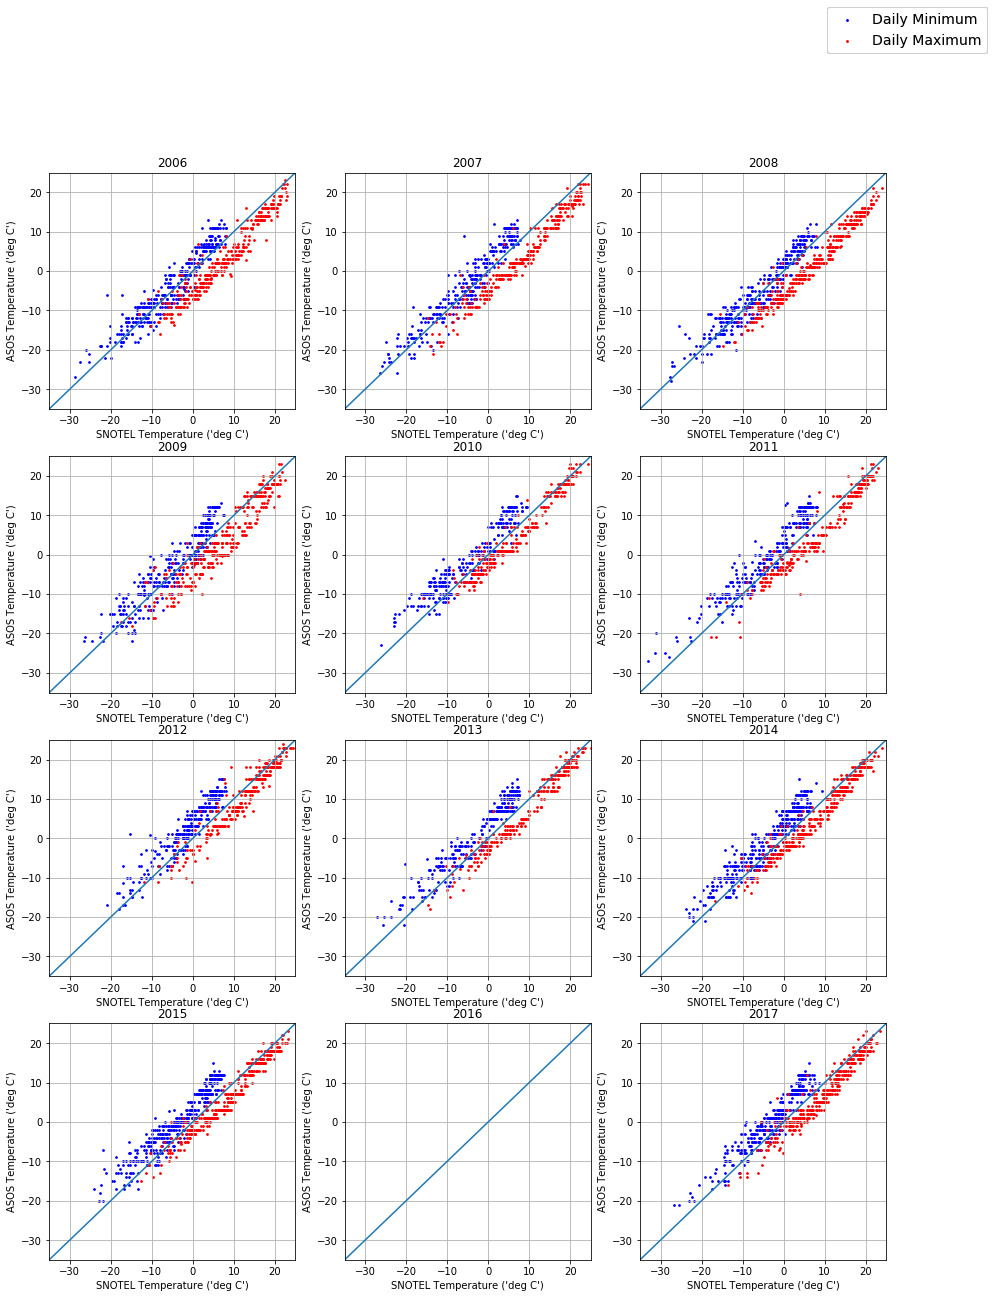

In [9]:
#%matplotlib notebook


fig = plt.figure(figsize=(15,20))
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for k in range(len(years)):
    ax1 = plt.subplot(4, 3, k+1)
        
        #plt.subplot(4, 3, k+1)
        #plt.figure(figsize=(15,5))
    dff_min = asos_df['%04s' % years[k]].interpolate(limit=3).resample('D', how = 'min').merge(snotel_filled_df['%04s' % years[k]].resample('D', how = 'min'), \
                                                                          right_index=True, left_index=True,how='outer').reset_index()
    
    dff_max = asos_df['%04s' % years[k]].interpolate(limit=3).resample('D', how = 'max').merge(snotel_filled_df['%04s' % years[k]].resample('D', how = 'max'), \
                                                                          right_index=True, left_index=True,how='outer').reset_index()
    
    dff_mean = asos_df['%04s' % years[k]].resample('D', how = 'mean').merge(snotel_filled_df['%04s' % years[k]].interpolate(limit=3).resample('D', how = 'mean'), \
                                                                          right_index=True, left_index=True,how='outer').reset_index()
    
    
        
    sct_min = plt.scatter(x=dff_min['TOBS.I-1 (degC) '], y=dff_min['Temperature_degC'], color='Blue', s = 3)
    sct_max = plt.scatter(x=dff_max['TOBS.I-1 (degC) '], y=dff_max['Temperature_degC'], color='Red', s = 3)
    plt.title(years[k])
        
    ax1.set_xlim(-35,25)
    ax1.set_ylim(-35,25)
    
    
    ax1.set_xlabel("SNOTEL Temperature ('deg C')")
    ax1.set_ylabel("ASOS Temperature ('deg C')")
    
    ax1.plot([-35, 25], [-35,25], '-')  #plot 1 to 1 line
    plt.grid(True)
    
    fig.legend((sct_min, sct_max), ('Daily Minimum', 'Daily Maximum'), fontsize = 14) 
    #ax1.legend(h1+h2, ['ASOS Temperature (deg C)', 'SNOTEL temperature (deg C)'], loc = 2)
#    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')
plt.show()

## Q5: What is distribution of snow depth data for each ski season?  
**To answer this question, box plots are generated by tabulating data by ski season.  The ski season was assumed to be November-April.  Breaking this up further by month would be a great next step.**  

74.0


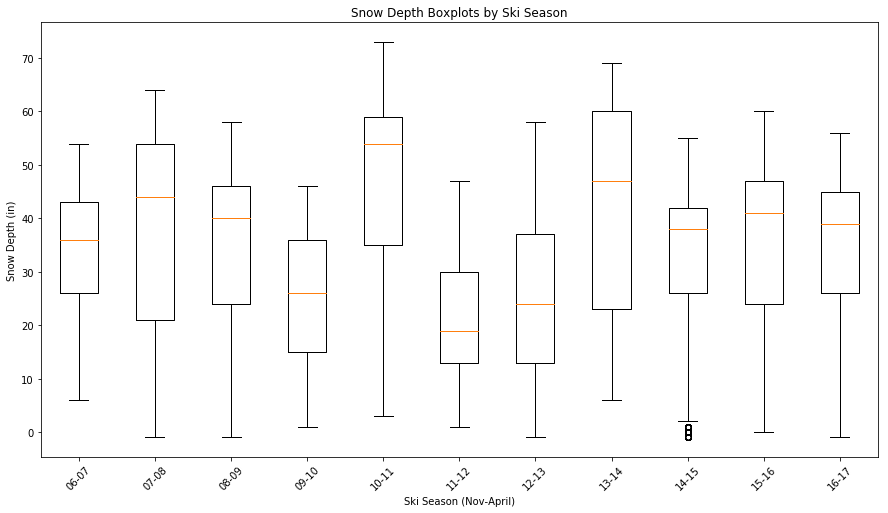

In [10]:
#%matplotlib notebook

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_filled_df['SNWD.I-1 (in) '][~np.isnan(snotel_filled_df['SNWD.I-1 (in) '])]
filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2 )
plt.title('Snow Depth Boxplots by Ski Season')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (in)')


#plt.set_xticklabels('06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17')
plt.show()

## Q5: When did 12-hr snowfall events >3" occur? 
**The intent of this question was to explore snowfall events. Snowfall was estimated by creating a new column with snow depth at every 12 hour interval.  Snowfall which occurs during each 12 hour interval is then calculated by subtracting the previous 12-hr resampled snow depth total for every snow depth value in the 12hr-SNOWDEPTH series. This is performed by using the shift function. A new series named 12hr-SNOWFALL is created which contains the snowfall totals for every 12 hour bin.  Snow storms which produced greatter then 3" were then plotted (by year) against the snow depth data.**

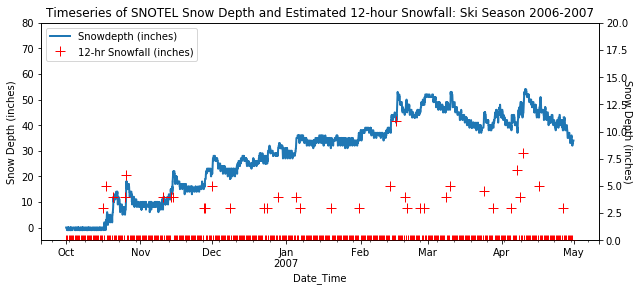

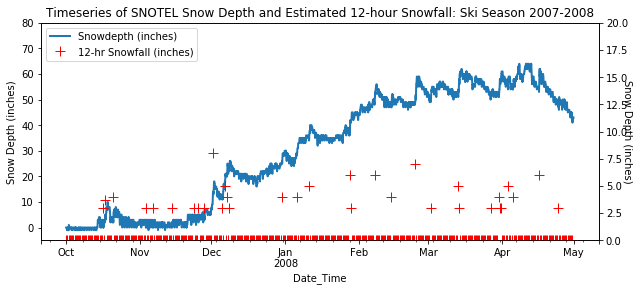

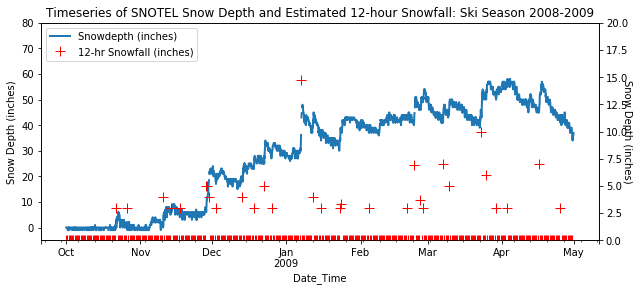

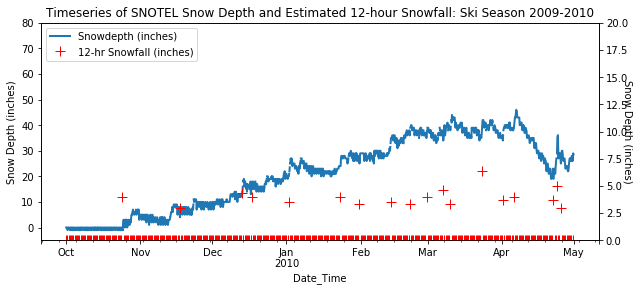

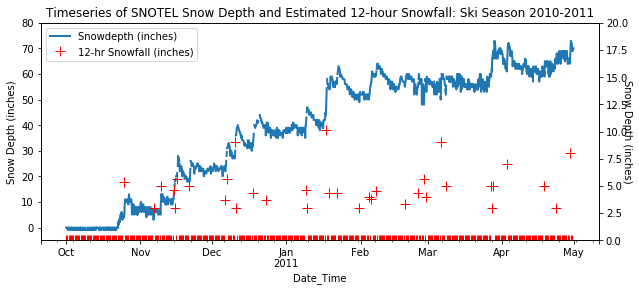

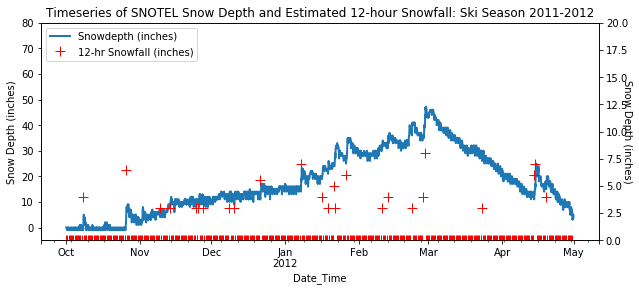

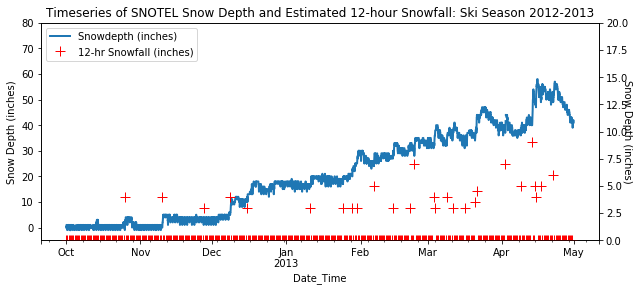

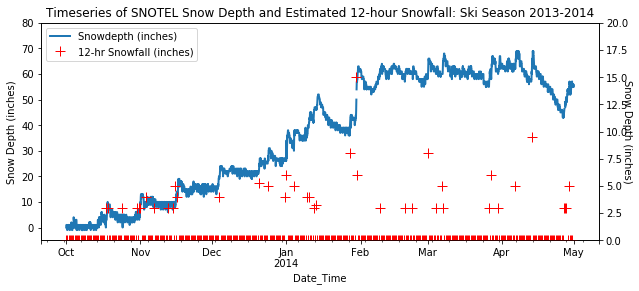

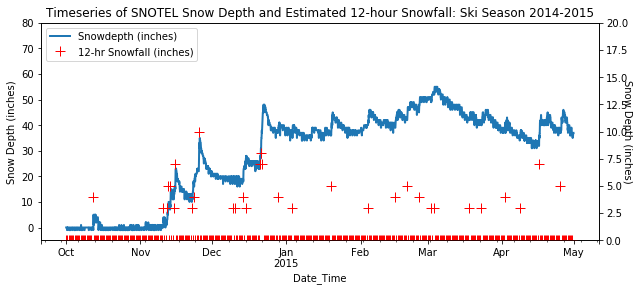

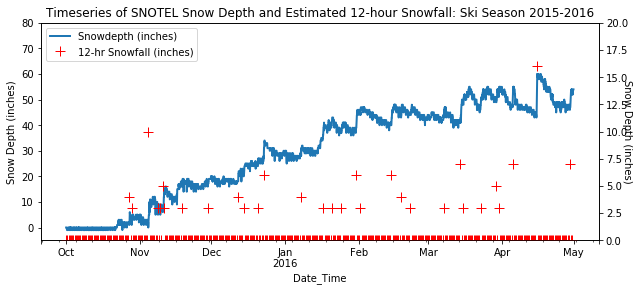

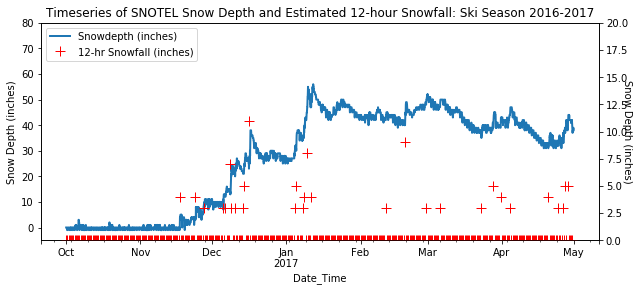

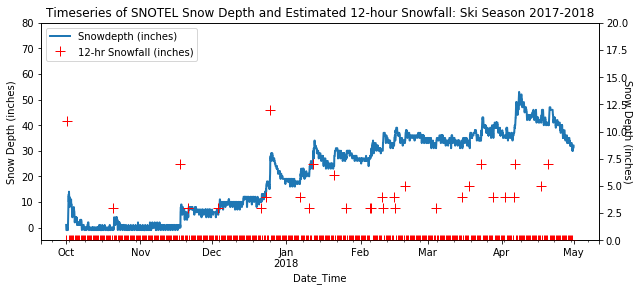

In [42]:
#%matplotlib notebook

#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_filled_df['12hr_SNWD'] = snotel_filled_df['SNWD.I-1 (in) '].resample('12H').last()
snotel_filled_df['12hr-SNOWFALL'] = snotel_filled_df['12hr_SNWD']-snotel_filled_df['12hr_SNWD'].shift(+12)
#only keep snowfall totals 3 or more"
zz=(snotel_filled_df['12hr-SNOWFALL']<3)
snotel_filled_df['12hr-SNOWFALL'][zz]=0
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

#['%02d-%04s' % (k+1,j)])
#print(snotel_df['SNWD.I-1 (in) '][('10-2009')].describe())
#print(snotel_df['SNWD.I-1 (in) '][('2009')])

for j in years:
    plt.figure(figsize=(10,4))
    
    #fig, ax = plt.subplots(figsize=(10,4))
    
    #plt1 = plt.plot(snotel_df['SNWD.I-1 (in) ']['2009':'2010'])
    startdate, enddate = '10-%04s' %j, '04-%04d' % (int(j)+1)
    plt1 = snotel_filled_df['SNWD.I-1 (in) '][startdate: enddate].plot(linewidth=2, label = 'SNWD')
    plt1.set_xlabel("Date")
    plt1.set_ylim(ymin=-5, ymax = 80)
    plt1.set_ylabel("Snow Depth (inches)")
    plt1.set_title("Timeseries of SNOTEL Snow Depth and Estimated 12-hour Snowfall: Ski Season " + j + "-" + str(int(j)+1))
    #ax2 = ax.twinx()
    
    plt2 = snotel_filled_df['12hr-SNOWFALL'][startdate: enddate].plot(secondary_y = True, marker='+', linewidth = 0, label = '12-hr-SNOWFALL', markersize = 10, color = 'r')
    plt2.set_ylim(ymin=0, ymax = 20)
    plt2.set_ylabel("Snow Depth (inches)", rotation = -90)
    
    #Create legend
    h1, l1 = plt1.get_legend_handles_labels()
    h2, l2 = plt2.get_legend_handles_labels()
    plt1.legend(h1+h2, ['Snowdepth (inches)','12-hr Snowfall (inches)'], loc=2)
    plt.show()
    


## Q6: What is distribution of snowfall events by ski season?  
**This answer was answered by creating a box plot.  One box was generated for each year.  The plot inicates that the largest snowfall occured in the 2015-2016 season.  That season also had the largest spread of snowfall events.  The smallest spread of snowfall occurred in 2009-2010.  Creating bar plots by month to see which of the twelve months have the greatest amount of snow and most snowfall events would be interesting to see.**

18.0


Text(0,0.5,'Snowfall Amount (in)')

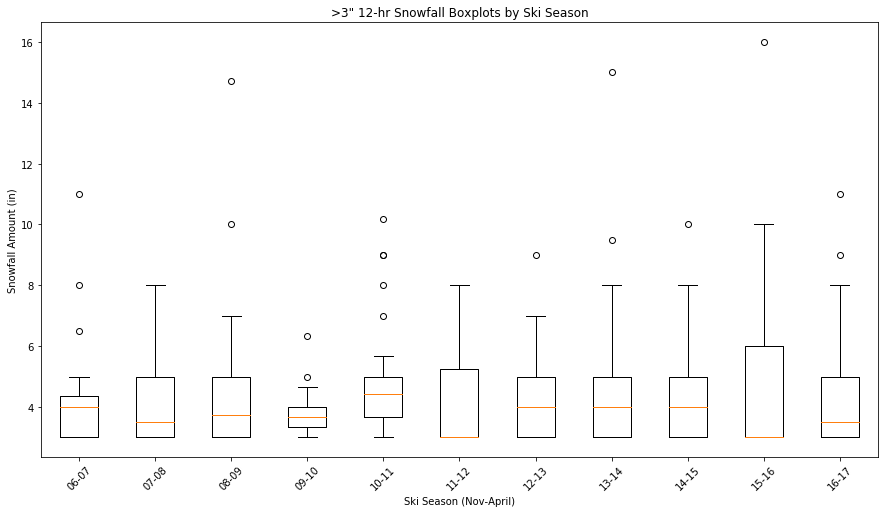

In [12]:
#%matplotlib notebook

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = snotel_filled_df['12hr-SNOWFALL'][~np.isnan(snotel_filled_df['12hr-SNOWFALL']) & snotel_filled_df['12hr-SNOWFALL']>0]
filtered_data2 = [filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']]
print(filtered_data.max())
plot =ax.boxplot(filtered_data2 )
plt.title('>3" 12-hr Snowfall Boxplots by Ski Season')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snowfall Amount (in)')